**Project:** Data Minining Project for  X company

The CRISP-DM Framework


The CRISP-DM methodology provides a structured approach to planning a data mining project. It is a robust and well-proven methodology.
* Business understanding (BU): Determine Business Objectives, Assess Situation, Determine Data Mining Goals, Produce Project Plan

* Data understanding (DU): Collect Initial Data, Describe Data, Explore Data, Verify Data Quality

* Data preparation (DP): Select Data, Clean Data, Construct Data, Integrate Data

* Modeling (M): Select modeling technique, Generate Test Design, Build Model, Assess Model
*  Evaluation (E): Evaluate Results, Review Process, Determine Next Steps
*  Deployment (D): Plan Deployment, Plan Monitoring and Maintenance, Produce Final Report, Review Project


References:

[What is the CRISP-DM methodology?](https://www.sv-europe.com/crisp-dm-methodology/)

[Introduction to CRISP DM Framework for Data Science and Machine Learning](https://www.linkedin.com/pulse/chapter-1-introduction-crisp-dm-framework-data-science-anshul-roy/)

**Data Set**
### The data is for company X which is trying to control attrition. 
### There are two sets of data: "Existing employees" and "Employees who have left". The following attributes are available for every employee.


*   Satisfaction Level

*   Last evaluation

*   Number of projects

*   Average monthly hours

*   Time spent at the company
*   Whether they have had a work accident


*  Whether they have had a promotion in the last 5 years


*   Departments (column sales)


*   Salary


*  Whether the employee has left


















**Your Role**
 

*   As data science team member X company asked you to answer this two questions.
*  What type of employees is leaving? 

*   Determine which employees are prone to leave next.






Business Understanding

---

This step mostly focuses on understanding the Business in all the different aspects. It follows the below different steps.




* Identify the goal and frame the business problem.
* Prepare Analytical Goal i.e. what type of performance metric and loss function to use
* Gather information on resource, constraints, assumptions, risks etc
* Gather information on resource, constraints, assumptions, risks etc
*   Prepare Work Flow Chart

### Write the main objectives of this project in your words?
minimum of 100 characters

In [ ]:
main_objectives ='''unticipate who is likely to leave, and what is causing them to leave. This might help keep the good emlployees
'''

In [ ]:
assert len(main_objectives) > 100 
### BEGIN HIDDEN TESTS
assert len(main_objectives) > 80 
### END HIDDEN TESTS

### Outline the different data analysis steps you will follow to carry out the project

In [ ]:
dm_outline = '''I will perform EDA, try and find out the similarities and what is unique from this two tables. 
i would perfom feature selection and plot a box plot
'''

In [ ]:
assert len(dm_outline) > 100 
### BEGIN HIDDEN TESTS
assert len(dm_outline) > 70 
### END HIDDEN TESTS

### What metrics will you use to measure the performance of your data analysis model? 
Write the equations of the metrics here

e.g. Precision = $\frac{TP}{(TP + FP)}$



Why do you choose these metrics? minimum of 100 characters

In [ ]:
why_metrics = '''it is known as a confusion metrix and it describes the complete performance of the model
'''

In [ ]:
assert len(why_metrics) > 100 
### BEGIN HIDDEN TESTS
assert len(why_metrics) > 80 
### END HIDDEN TESTS

### How would you know if your data analysis work is a success or not?
minimum of 100 characters

In [ ]:
how_success = '''I will treat the current employee table as a train set and input a new record to test and
the employee who left as the validation table because they have are truely gone.I will calulate the score afterwards 
'''

In [ ]:
assert len(how_success) > 100 
### BEGIN HIDDEN TESTS
assert len(how_success) > 80 
### END HIDDEN TESTS

## What kind of challenges do you expect in your analysis?
List at least 3 challenges

In [ ]:
challenge_text = '''1.
'''

In [ ]:
assert len(challenge_text) > 100 
### BEGIN HIDDEN TESTS
assert len(how_success) > 80 
### END HIDDEN TESTS

<h2>Using the processed twitter data from yesterday's challenge</h2>.


- Form a new data frame (named `cleanTweet`), containing columns $\textbf{clean-text}$ and $\textbf{polarity}$.

- Write a function `text_category` that takes a value `p` and returns, depending on the value of p, a string `'positive'`, `'negative'` or `'neutral'`.

- Apply this function (`text_category`) on the $\textbf{polarity}$ column of `cleanTweet` in 1 above to form a new column called $\textbf{score}$ in `cleanTweet`.

- Visualize The $\textbf{score}$ column using piechart and barchart

<h5>Now we want to build a classification model on the clean tweet following the steps below:</h5>

* Remove rows from `cleanTweet` where $\textbf{polarity}$ $= 0$ (i.e where $\textbf{score}$ = Neutral) and reset the frame index.
* Construct a column $\textbf{scoremap}$ Use the mapping {'positive':1, 'negative':0} on the $\textbf{score}$ column
* Create feature and target variables `(X,y)` from $\textbf{clean-text}$ and $\textbf{scoremap}$ columns respectively.
* Use `train_test_split` function to construct `(X_train, y_train)` and `(X_test, y_test)` from `(X,y)`

* Build an `SGDClassifier` model from the vectorize train text data. Use `CountVectorizer()` with a $\textit{trigram}$ parameter.

* Evaluate your model on the test data.


In [132]:
import pandas as pd
import numpy as np
import sys
import tweepy
import os
import nltk
import pycountry
import re
import string
from scipy.sparse import csr_matrix
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from joblib import dump, load
from scipy.sparse import save_npz, load_npz
from sklearn.decomposition import NMF, LatentDirichletAllocation
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords,WordListCorpusReader
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [131]:
!pip install WordListCorpusReader

ERROR: Could not find a version that satisfies the requirement WordListCorpusReader
ERROR: No matching distribution found for WordListCorpusReader


In [80]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [2]:
tweets = pd.read_csv('cleaned_fintech_data.csv')
tweets.head()

,Unnamed: 0,created_at,source,original_text,clean_text,sentiment,polarity,subjectivity,lang,favorite_count,...,original_author,screen_count,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,place_coord_boundaries,timestamp
0,0.0,Thu Jun 17 06:26:34 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Giving forth life is becoming a burden in Keny...,Giving forth life becoming burden Kenya This m...,"Sentiment(polarity=0.3194444444444445, subject...",0.3194444444444445,0.5305555555555556,en,0,...,reen_law,398,70,223,NaN,NaN,janetmachuka_,NaN,NaN,2021-06-17 06:26:34+00:00
1,1.0,Thu Jun 17 06:26:37 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",Teenmaar - 26cr\nPanja - 32.5cr\nGabbarsingh -...,Teenmaar crPanja crGabbarsingh cr Khaleja Kuda...,"Sentiment(polarity=0.0, subjectivity=0.0)",0.0,0.0,in,0,...,Amigo9999_,19047,132,1084,NaN,NaN,maheshblood,NaN,India,2021-06-17 06:26:37+00:00
2,2.0,Thu Jun 17 06:26:42 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",Rei chintu 2013 lo Vachina Ad Nizam ne 2018 lo...,Rei chintu lo Vachina Ad Nizam ne lo kottaru f...,"Sentiment(polarity=0.0, subjectivity=0.0)",0.0,0.0,hi,0,...,MallaSuhaas,47341,2696,2525,NaN,NaN,Hail_Kalyan,NaN,Vizag,2021-06-17 06:26:42+00:00
3,3.0,Thu Jun 17 06:26:44 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...",Today is World Day to Combat #Desertification ...,Today World Day Combat Restoring degraded land...,"Sentiment(polarity=0.25, subjectivity=0.65)",0.25,0.65,en,0,...,CIACOceania,7039,343,387,NaN,"Desertification, Drought, resilience",EdwardVrkic,NaN,Papua New Guinea,2021-06-17 06:26:44+00:00
4,4.0,Thu Jun 17 06:26:47 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",Hearing #GregHunt say he's confident vaccines ...,Hearing say 's confident vaccines delivered li...,"Sentiment(polarity=0.5, subjectivity=0.8333333...",0.5,0.8333333333333334,en,0,...,MccarronWendy,26064,419,878,NaN,"GregHunt, Morrison",WriteWithDave,NaN,"Sydney, New South Wales",2021-06-17 06:26:47+00:00


In [3]:
clean_tweet= ["clean_text","polarity"]
tweets[clean_tweet].head()


,clean_text,polarity
0,Giving forth life becoming burden Kenya This m...,0.3194444444444445
1,Teenmaar crPanja crGabbarsingh cr Khaleja Kuda...,0.0
2,Rei chintu lo Vachina Ad Nizam ne lo kottaru f...,0.0
3,Today World Day Combat Restoring degraded land...,0.25
4,Hearing say 's confident vaccines delivered li...,0.5


In [4]:
CleanTweets = tweets[clean_tweet]
CleanTweets.head()

,clean_text,polarity
0,Giving forth life becoming burden Kenya This m...,0.3194444444444445
1,Teenmaar crPanja crGabbarsingh cr Khaleja Kuda...,0.0
2,Rei chintu lo Vachina Ad Nizam ne lo kottaru f...,0.0
3,Today World Day Combat Restoring degraded land...,0.25
4,Hearing say 's confident vaccines delivered li...,0.5


In [5]:
CleanTweets["polarity"].describe()

count     5621
unique     246
top        0.0
freq      2134
Name: polarity, dtype: object

In [6]:
'''#Calculating Negative, Positive, Neutral and Compound values
tw_list[[‘polarity’, ‘subjectivity’]] = tw_list[‘text’].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list[‘text’].iteritems():
 score = SentimentIntensityAnalyzer().polarity_scores(row)
 neg = score[‘neg’]
 neu = score[‘neu’]
 pos = score[‘pos’]
 comp = score[‘compound’]
 if neg > pos:
 tw_list.loc[index, ‘sentiment’] = “negative”
 elif pos > neg:
 tw_list.loc[index, ‘sentiment’] = “positive”
 else:
 tw_list.loc[index, ‘sentiment’] = “neutral”
 tw_list.loc[index, ‘neg’] = neg
 tw_list.loc[index, ‘neu’] = neu
 tw_list.loc[index, ‘pos’] = pos
 tw_list.loc[index, ‘compound’] = comp'''

def text_category (p):
    if(p > 0):
        return "positive"
    elif(p < 0):
        return "negative"  
    elif(p==0):
        return "neutral"  


In [110]:
#CleanTweets["polarity"] = pd.to_numeric(CleanTweets["polarity"])
#CleanTweets['score'] =CleanTweets['polarity'].apply(text_category)
#CleanTweets= CleanTweets.astype({"polarity":'float'})
#CleanTweets.astype({'polarity': 'float'}).dtypes
#CleanTweets['polarity'] = CleanTweets.polarity.astype(float)
#CleanTweets["polarity"]= CleanTweets["polarity"].astype(float)
#pd.to_numeric(CleanTweets.polarity)
CleanTweets["polarity"]=pd.to_numeric(CleanTweets["polarity"], errors='coerce')
CleanTweets["polarity"].describe()

count    3486.000000
mean        0.162701
std         0.270288
min        -0.800000
25%         0.036364
50%         0.154167
75%         0.350000
max         1.000000
Name: polarity, dtype: float64

In [111]:
CleanTweets['score'] = CleanTweets['polarity'].apply(text_category)



In [9]:
CleanTweets.head(1000)

,clean_text,polarity,score
0,Giving forth life becoming burden Kenya This m...,0.319444,positive
1,Teenmaar crPanja crGabbarsingh cr Khaleja Kuda...,0.000000,neutral
2,Rei chintu lo Vachina Ad Nizam ne lo kottaru f...,0.000000,neutral
3,Today World Day Combat Restoring degraded land...,0.250000,positive
4,Hearing say 's confident vaccines delivered li...,0.500000,positive
...,...,...,...
995,Credit/Debit yrs kastam .. Top lo kuda compari...,0.500000,positive
996,Macam-macam bentuk selaput dara Elastisitas be...,0.500000,positive
997,I n't want meat Australia Besides ghastly anim...,0.000000,neutral
998,`` By Mazda assumes quarter products fully ele...,0.100000,positive


In [19]:
#Creating new data frames for all sentiments (positive, negative and neutral)
CleanTweets_negative = CleanTweets[CleanTweets["score"]=="negative"]
CleanTweets_positive = CleanTweets[CleanTweets["score"]=="positive"]
CleanTweets_neutral = CleanTweets[CleanTweets["score"]=="neutral"]

In [134]:
def count_values_in_column(data,feature):
    total = data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2) 
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(CleanTweets,"score")

,Total,Percentage
positive,2648,75.96
negative,838,24.04


<AxesSubplot:>

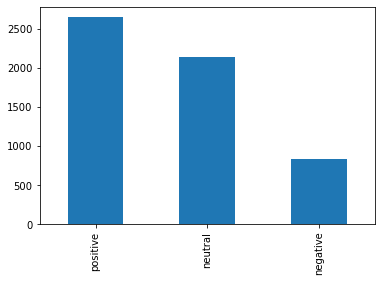

In [11]:
CleanTweets['score'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='score'>

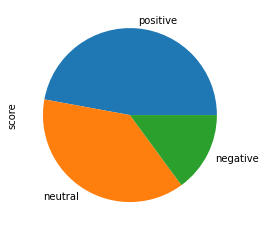

In [25]:

CleanTweets['score'].value_counts().plot(kind='pie')


In [112]:

path = r"C:\Users\Jakinda\Documents\Python Scripts\challenge2\challenge2\cloud.png"
assert os.path.isfile(path)
with open(path, "r") as f:
    pass

AssertionError: 

In [51]:
def create_wordcloud(text):
    mask = np.array(Image.open())
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
    mask = mask,
    max_words=3000,
    stopwords=stopwords,
    repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("word cloud saved")
    path="wc.png"
    display(Image.open(path))

In [122]:
def draw_wordcloud(msgs):
    """
        Draw wordcloud for visualization of the most used words 
        during conversation
        args: msgs chat content
        return: a wordcloud with the most used words having the 
        highest font value 
    """
    allWords = ' '.join([twts for twts in msgs])
    wordCloud = WordCloud(width=350, height=170, random_state=21, max_words=190, mode='RGBA',
                      max_font_size=150, stopwords=stopwords, scale=9,
                        min_word_length=4).generate(allWords)
    plt.figure(figsize=(20, 12))
    plt.imshow(wordCloud, interpolation="bilinear")
    plt.axis('off')
    plt.tight_layout(); plt.title('most used words', size=20)
    plt.savefig('masked_wordcloud.jpg')
    plt.show()

In [127]:
#CleanTweets.iloc[1743]

count_values_in_column(CleanTweets,"score")

,Total,Percentage
positive,2648,75.96
negative,838,24.04


In [133]:
#Creating wordcloud for all tweets
draw_wordcloud(CleanTweets["score"].values)

TypeError: 'WordListCorpusReader' object is not iterable

In [58]:
#Creating wordcloud for positive sentiment
create_wordcloud(CleanTweets_positive["score"].values)

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\Jakinda\\Documents\\Python Scripts\\challenge2\\challenge2\\cloud'

In [ ]:
#Creating wordcloud for negative sentiment
create_wordcloud(CleanTweets_negative["score"].values)

In [63]:
#Removing Punctuation
def remove_punct(text):
    text = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0–9]+', '', text)
    return text
CleanTweets['punct'] = CleanTweets['clean_text'].apply(lambda x: remove_punct(x))
CleanTweets.head()

,clean_text,polarity,score,text_len,text_word_count,punct
0,Giving forth life becoming burden Kenya This m...,0.319444,positive,188,27,Giving forth life becoming burden Kenya This m...
1,Today World Day Combat Restoring degraded land...,0.250000,positive,146,22,Today World Day Combat Restoring degraded land...
2,Hearing say 's confident vaccines delivered li...,0.500000,positive,92,14,Hearing say s confident vaccines delivered lik...
3,Today World Day Combat Restoring degraded land...,0.250000,positive,146,22,Today World Day Combat Restoring degraded land...
4,Austria `` right '' grid tariffs regulatory re...,0.285714,positive,82,13,Austria right grid tariffs regulatory regime...


In [65]:
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text
CleanTweets['tokenized'] = CleanTweets['punct'].apply(lambda x: tokenization(x.lower()))
CleanTweets.head()

,clean_text,polarity,score,text_len,text_word_count,punct,tokenized
0,Giving forth life becoming burden Kenya This m...,0.319444,positive,188,27,Giving forth life becoming burden Kenya This m...,"[giving, forth, life, becoming, burden, kenya,..."
1,Today World Day Combat Restoring degraded land...,0.250000,positive,146,22,Today World Day Combat Restoring degraded land...,"[today, world, day, combat, restoring, degrade..."
2,Hearing say 's confident vaccines delivered li...,0.500000,positive,92,14,Hearing say s confident vaccines delivered lik...,"[hearing, say, s, confident, vaccines, deliver..."
3,Today World Day Combat Restoring degraded land...,0.250000,positive,146,22,Today World Day Combat Restoring degraded land...,"[today, world, day, combat, restoring, degrade..."
4,Austria `` right '' grid tariffs regulatory re...,0.285714,positive,82,13,Austria right grid tariffs regulatory regime...,"[austria, right, grid, tariffs, regulatory, re..."


In [82]:
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
CleanTweets['nonstop'] = CleanTweets['tokenized'].apply(lambda x: remove_stopwords(x))
CleanTweets.head()

,clean_text,polarity,score,text_len,text_word_count,punct,tokenized,nonstop
0,Giving forth life becoming burden Kenya This m...,0.319444,positive,188,27,Giving forth life becoming burden Kenya This m...,"[giving, forth, life, becoming, burden, kenya,...","[giving, forth, life, becoming, burden, kenya,..."
1,Today World Day Combat Restoring degraded land...,0.250000,positive,146,22,Today World Day Combat Restoring degraded land...,"[today, world, day, combat, restoring, degrade...","[today, world, day, combat, restoring, degrade..."
2,Hearing say 's confident vaccines delivered li...,0.500000,positive,92,14,Hearing say s confident vaccines delivered lik...,"[hearing, say, s, confident, vaccines, deliver...","[hearing, say, confident, vaccines, delivered,..."
3,Today World Day Combat Restoring degraded land...,0.250000,positive,146,22,Today World Day Combat Restoring degraded land...,"[today, world, day, combat, restoring, degrade...","[today, world, day, combat, restoring, degrade..."
4,Austria `` right '' grid tariffs regulatory re...,0.285714,positive,82,13,Austria right grid tariffs regulatory regime...,"[austria, right, grid, tariffs, regulatory, re...","[austria, right, grid, tariffs, regulatory, re..."


In [84]:
#Appliyng Stemmer
ps = nltk.PorterStemmer()
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text
CleanTweets['stemmed'] = CleanTweets['nonstop'].apply(lambda x: stemming(x))
CleanTweets.head()

,clean_text,polarity,score,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,Giving forth life becoming burden Kenya This m...,0.319444,positive,188,27,Giving forth life becoming burden Kenya This m...,"[giving, forth, life, becoming, burden, kenya,...","[giving, forth, life, becoming, burden, kenya,...","[give, forth, life, becom, burden, kenya, moth..."
1,Today World Day Combat Restoring degraded land...,0.250000,positive,146,22,Today World Day Combat Restoring degraded land...,"[today, world, day, combat, restoring, degrade...","[today, world, day, combat, restoring, degrade...","[today, world, day, combat, restor, degrad, la..."
2,Hearing say 's confident vaccines delivered li...,0.500000,positive,92,14,Hearing say s confident vaccines delivered lik...,"[hearing, say, s, confident, vaccines, deliver...","[hearing, say, confident, vaccines, delivered,...","[hear, say, confid, vaccin, deliv, like, hear,..."
3,Today World Day Combat Restoring degraded land...,0.250000,positive,146,22,Today World Day Combat Restoring degraded land...,"[today, world, day, combat, restoring, degrade...","[today, world, day, combat, restoring, degrade...","[today, world, day, combat, restor, degrad, la..."
4,Austria `` right '' grid tariffs regulatory re...,0.285714,positive,82,13,Austria right grid tariffs regulatory regime...,"[austria, right, grid, tariffs, regulatory, re...","[austria, right, grid, tariffs, regulatory, re...","[austria, right, grid, tariff, regulatori, reg..."


In [85]:
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [86]:
CleanTweets.head()

,clean_text,polarity,score,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,Giving forth life becoming burden Kenya This m...,0.319444,positive,188,27,Giving forth life becoming burden Kenya This m...,"[giving, forth, life, becoming, burden, kenya,...","[giving, forth, life, becoming, burden, kenya,...","[give, forth, life, becom, burden, kenya, moth..."
1,Today World Day Combat Restoring degraded land...,0.250000,positive,146,22,Today World Day Combat Restoring degraded land...,"[today, world, day, combat, restoring, degrade...","[today, world, day, combat, restoring, degrade...","[today, world, day, combat, restor, degrad, la..."
2,Hearing say 's confident vaccines delivered li...,0.500000,positive,92,14,Hearing say s confident vaccines delivered lik...,"[hearing, say, s, confident, vaccines, deliver...","[hearing, say, confident, vaccines, delivered,...","[hear, say, confid, vaccin, deliv, like, hear,..."
3,Today World Day Combat Restoring degraded land...,0.250000,positive,146,22,Today World Day Combat Restoring degraded land...,"[today, world, day, combat, restoring, degrade...","[today, world, day, combat, restoring, degrade...","[today, world, day, combat, restor, degrad, la..."
4,Austria `` right '' grid tariffs regulatory re...,0.285714,positive,82,13,Austria right grid tariffs regulatory regime...,"[austria, right, grid, tariffs, regulatory, re...","[austria, right, grid, tariffs, regulatory, re...","[austria, right, grid, tariff, regulatori, reg..."


In [88]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(CleanTweets['clean_text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

3487 Number of reviews has 4004 words


In [89]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

,,aa,aadi,aapanu,aapina,aarc,aath,aathi,aathu,aayana,...,zeroreli,zerowast,zerva,zimbabw,zindhabad,zone,zooplankton,zvamunokoshesawo,zvimw,zvinhu
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
kuda,1082
amp,860
lo,648
emiss,620
oil,568
gt,484
right,440
tax,420
use,410
neutral,400


In [93]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
#n2_bigram
n2_bigrams = get_top_n_gram(CleanTweets['clean_text'],(2,2),20)
n2_bigrams

[('carbon neutral', 394),
 ('gt gt', 364),
 ('selaput dara', 292),
 ('carbon tax', 214),
 ('box office', 202),
 ('ki kuda', 198),
 ('electoral reform', 192),
 ('new coal', 192),
 ('lambie voted', 190),
 ('voted medivac', 190),
 ('medivac carbon', 190),
 ('tax protecting', 190),
 ('protecting whistleblowers', 190),
 ('whistleblowers banning', 190),
 ('banning new', 190),
 ('coal mines', 190),
 ('mines protecting', 190),
 ('protecting barrier', 190),
 ('barrier reef', 190),
 ('reef senate', 190)]

In [95]:
#n3_trigram
n3_trigrams = get_top_n_gram(CleanTweets['clean_text'],(3,3),20)
n3_trigrams

[('gt gt gt', 250),
 ('lambie voted medivac', 190),
 ('voted medivac carbon', 190),
 ('medivac carbon tax', 190),
 ('carbon tax protecting', 190),
 ('tax protecting whistleblowers', 190),
 ('protecting whistleblowers banning', 190),
 ('whistleblowers banning new', 190),
 ('banning new coal', 190),
 ('new coal mines', 190),
 ('coal mines protecting', 190),
 ('mines protecting barrier', 190),
 ('protecting barrier reef', 190),
 ('barrier reef senate', 190),
 ('reef senate electoral', 190),
 ('senate electoral reform', 190),
 ('electoral reform minerals', 190),
 ('reform minerals resource', 190),
 ('minerals resource rent', 190),
 ('resource rent tax', 190)]